# Sentiment Analysis with Python: A Comprehensive Guide 📊

This project demonstrates advanced sentiment analysis techniques using Python, comparing traditional lexicon-based approaches with modern deep learning methods. Perfect for data scientists and NLP enthusiasts looking to understand different sentiment analysis approaches.

## 🎯 Project Overview

This notebook implements and compares three powerful sentiment analysis techniques:

1. **VADER (Valence Aware Dictionary and sEntiment Reasoner)**
   - A rule-based sentiment analysis tool specifically attuned to sentiments expressed in social media
   - Excellent for analyzing short texts like tweets, reviews, and comments
   - No training required, works out of the box

2. **RoBERTa Pretrained Model**
   - State-of-the-art transformer-based model from 🤗 Hugging Face
   - Contextual understanding of text
   - Superior performance on complex sentences

3. **Hugging Face Pipeline**
   - Streamlined implementation for quick sentiment analysis
   - Production-ready solution
   - Easy to integrate into applications

## 🔧 Technologies Used

- Python 3.x
- NLTK
- Transformers (Hugging Face)
- Pandas & NumPy
- Matplotlib & Seaborn

## 📈 Use Cases

This analysis is particularly useful for:
- Social Media Monitoring
- Customer Feedback Analysis
- Product Review Assessment
- Brand Sentiment Tracking
- Market Research

Let's dive into the implementation and see how these different approaches compare in real-world scenarios!

# Step 0 - Read in Data and NLTK Basics

# 1. Environment Setup and Data Preparation 🛠️

In this section, we'll:
1. Import required libraries
2. Load and prepare our dataset
3. Perform initial data exploration

We're using a real-world dataset of Amazon product reviews to demonstrate practical applications of sentiment analysis.

In [1]:
# Essential data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better-looking visualizations
plt.style.use('ggplot')

# Natural Language Processing toolkit
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lokma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lokma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\lokma\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\lokma\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lokma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Load the Amazon product reviews dataset
df = pd.read_csv('Reviews.csv')
print(f'Total number of reviews in dataset: {df.shape[0]:,}')

# For demonstration purposes, we'll use a subset of 500 reviews
df = df.head(500)
print(f'Number of reviews in our sample: {df.shape[0]:,}')

Total number of reviews in dataset: 568,454
Number of reviews in our sample: 500


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 📊 Exploratory Data Analysis

Let's explore our dataset to understand:
1. Distribution of review scores
2. Sample reviews and their characteristics
3. Basic text analysis using NLTK

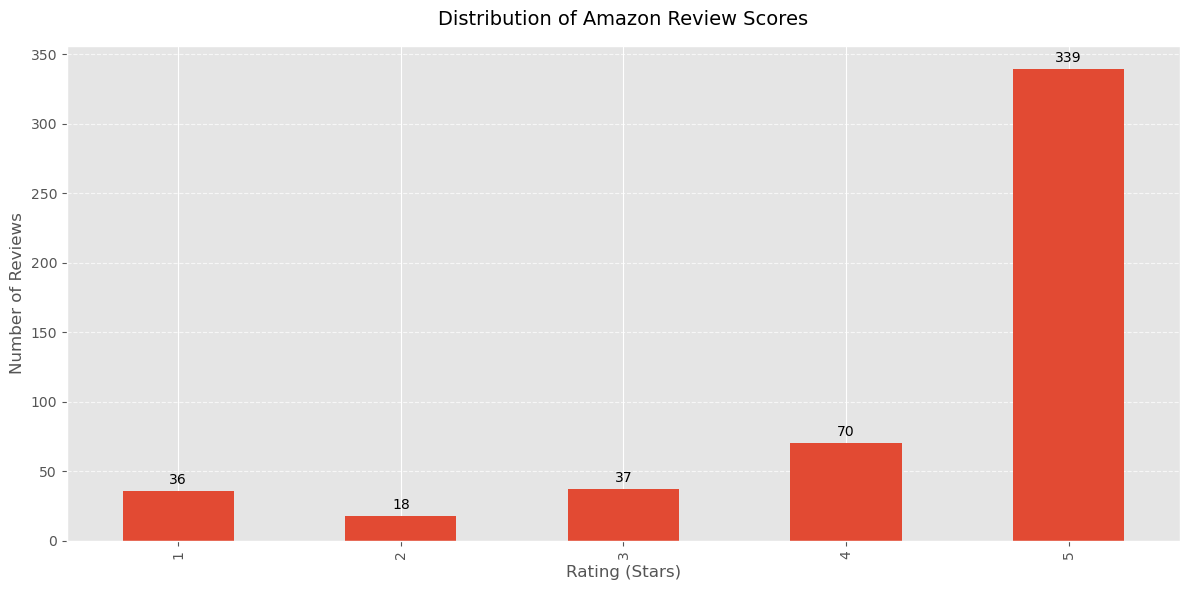


Quick Statistics:
Average Rating: 4.32 stars
Most Common Rating: 5 stars
Rating Spread (std): 1.20 stars


In [4]:
# Create a more informative visualization of review scores
plt.figure(figsize=(12, 6))
ax = df['Score'].value_counts().sort_index().plot(kind='bar')

# Customize the visualization
plt.title('Distribution of Amazon Review Scores', fontsize=14, pad=15)
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Add value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, padding=3)

# Improve layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print summary statistics
print('\nQuick Statistics:')
print(f'Average Rating: {df["Score"].mean():.2f} stars')
print(f'Most Common Rating: {df["Score"].mode()[0]} stars')
print(f'Rating Spread (std): {df["Score"].std():.2f} stars')

## Basic NLTK

In [5]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [7]:
from nltk.tag import pos_tag

tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# 2. VADER Sentiment Analysis 📈

[VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) is a lexicon and rule-based sentiment analysis tool specifically attuned to sentiments expressed in social media. Let's explore how it works!

### How VADER Works:
1. **Lexicon-based**: Uses a dictionary of words rated for sentiment
2. **Rule-based**: Considers:
   - Punctuation (!!!) that increases intensity
   - Capitalization (GREAT vs great)
   - Modifiers (very good vs good)
   - Negation (not good)

### VADER Scores:
- **compound**: Normalized score from -1 (most negative) to +1 (most positive)
- **pos**: Proportion of text that is positive
- **neu**: Proportion of text that is neutral
- **neg**: Proportion of text that is negative

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
# To observe the neg/neu/pos scores for "I am happy!"
sia.polarity_scores('I am so happy!')

# Let's analyze some common social media style texts
examples = [
    "I LOVE this product! It's amazing!!!",
    "This is a good product",
    "This is just okay :|",
    "Not a fan of this product",
    "This is the WORST product ever!!! Stay away!!!"
]

print("VADER Sentiment Analysis Examples:\n")
for text in examples:
    scores = sia.polarity_scores(text)
    print(f'Text: "{text}"')
    print(f'Scores: {scores}')
    interpretation = (
        "Positive" if scores["compound"] > 0 else
        "Negative" if scores["compound"] < 0 else
        "Neutral"
    )
    print(f'Interpretation: {interpretation:>8}')

VADER Sentiment Analysis Examples:

Text: "I LOVE this product! It's amazing!!!"
Scores: {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.8979}
Interpretation: Positive
Text: "This is a good product"
Scores: {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
Interpretation: Positive
Text: "This is just okay :|"
Scores: {'neg': 0.222, 'neu': 0.476, 'pos': 0.302, 'compound': 0.128}
Interpretation: Positive
Text: "Not a fan of this product"
Scores: {'neg': 0.329, 'neu': 0.671, 'pos': 0.0, 'compound': -0.2411}
Interpretation: Negative
Text: "This is the WORST product ever!!! Stay away!!!"
Scores: {'neg': 0.462, 'neu': 0.538, 'pos': 0.0, 'compound': -0.7906}
Interpretation: Negative


In [18]:
# To observe the neg/neu/pos scores for "This is the worst thing ever."
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [19]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [20]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [21]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how = 'left')

In [22]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER results

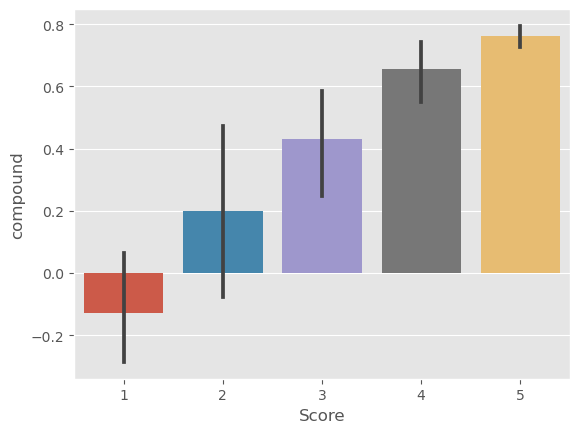

In [23]:
sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

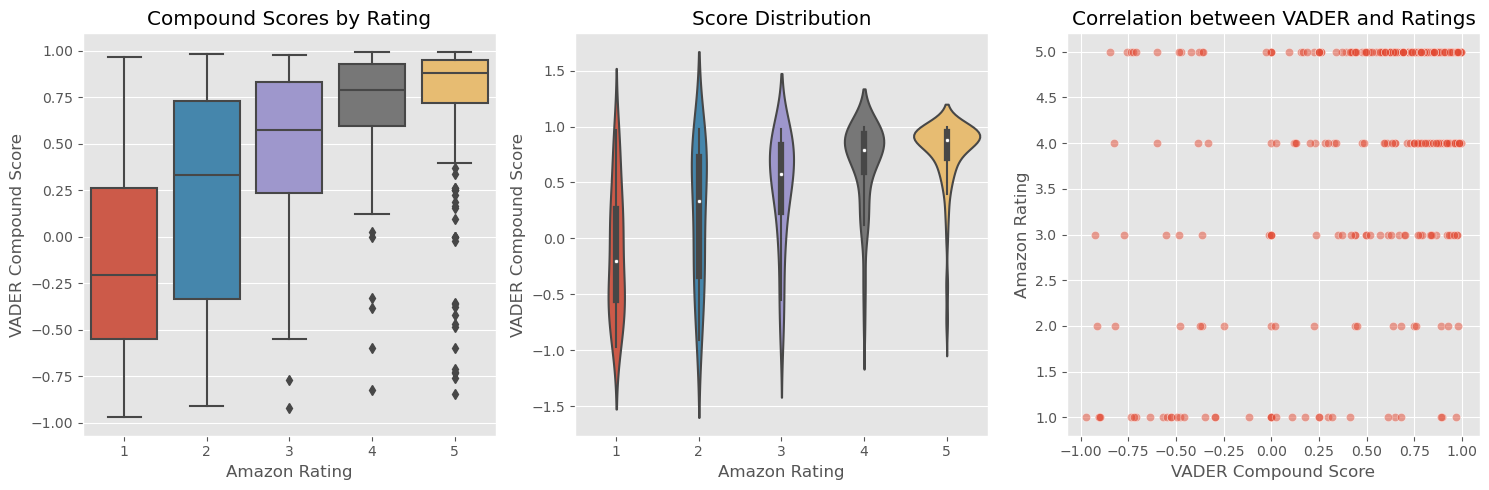


Correlation between VADER compound score and Amazon rating: 0.536


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'vaders' DataFrame is already defined with 'Score', 'pos', 'neu', 'neg', and 'compound' columns

# Create a more insightful visualization of VADER scores
plt.figure(figsize=(15, 5))

# Create subplots for different aspects of VADER analysis
plt.subplot(131)
sns.boxplot(data=vaders, x='Score', y='compound')
plt.title('Compound Scores by Rating')
plt.xlabel('Amazon Rating')
plt.ylabel('VADER Compound Score')

plt.subplot(132)
sns.violinplot(data=vaders, x='Score', y='compound')
plt.title('Score Distribution')
plt.xlabel('Amazon Rating')
plt.ylabel('VADER Compound Score')

plt.subplot(133)
sns.scatterplot(data=vaders, x='compound', y='Score', alpha=0.5)
plt.title('Correlation between VADER and Ratings')
plt.xlabel('VADER Compound Score')
plt.ylabel('Amazon Rating')

plt.tight_layout()
plt.show()

# Print correlation statistics
corr = vaders['compound'].corr(vaders['Score'])
print(f'\nCorrelation between VADER compound score and Amazon rating: {corr:.3f}')

# 3. RoBERTa Model Analysis 🤖

Now we'll use the RoBERTa model, a state-of-the-art transformer-based model for sentiment analysis. Unlike VADER, RoBERTa:

- Understands context and relationships between words
- Can capture complex linguistic patterns
- Has been trained on massive amounts of text data
- Can better understand modern language usage and idioms

In [25]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

W0618 13:51:42.117000 29108 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


In [26]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [27]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [28]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687466, 'roberta_pos': 0.0029573706}


In [29]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [30]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [31]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how = 'left')

## Compare Scores between models

In [32]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Step 3. Combine and Compare

c:\Users\lokma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

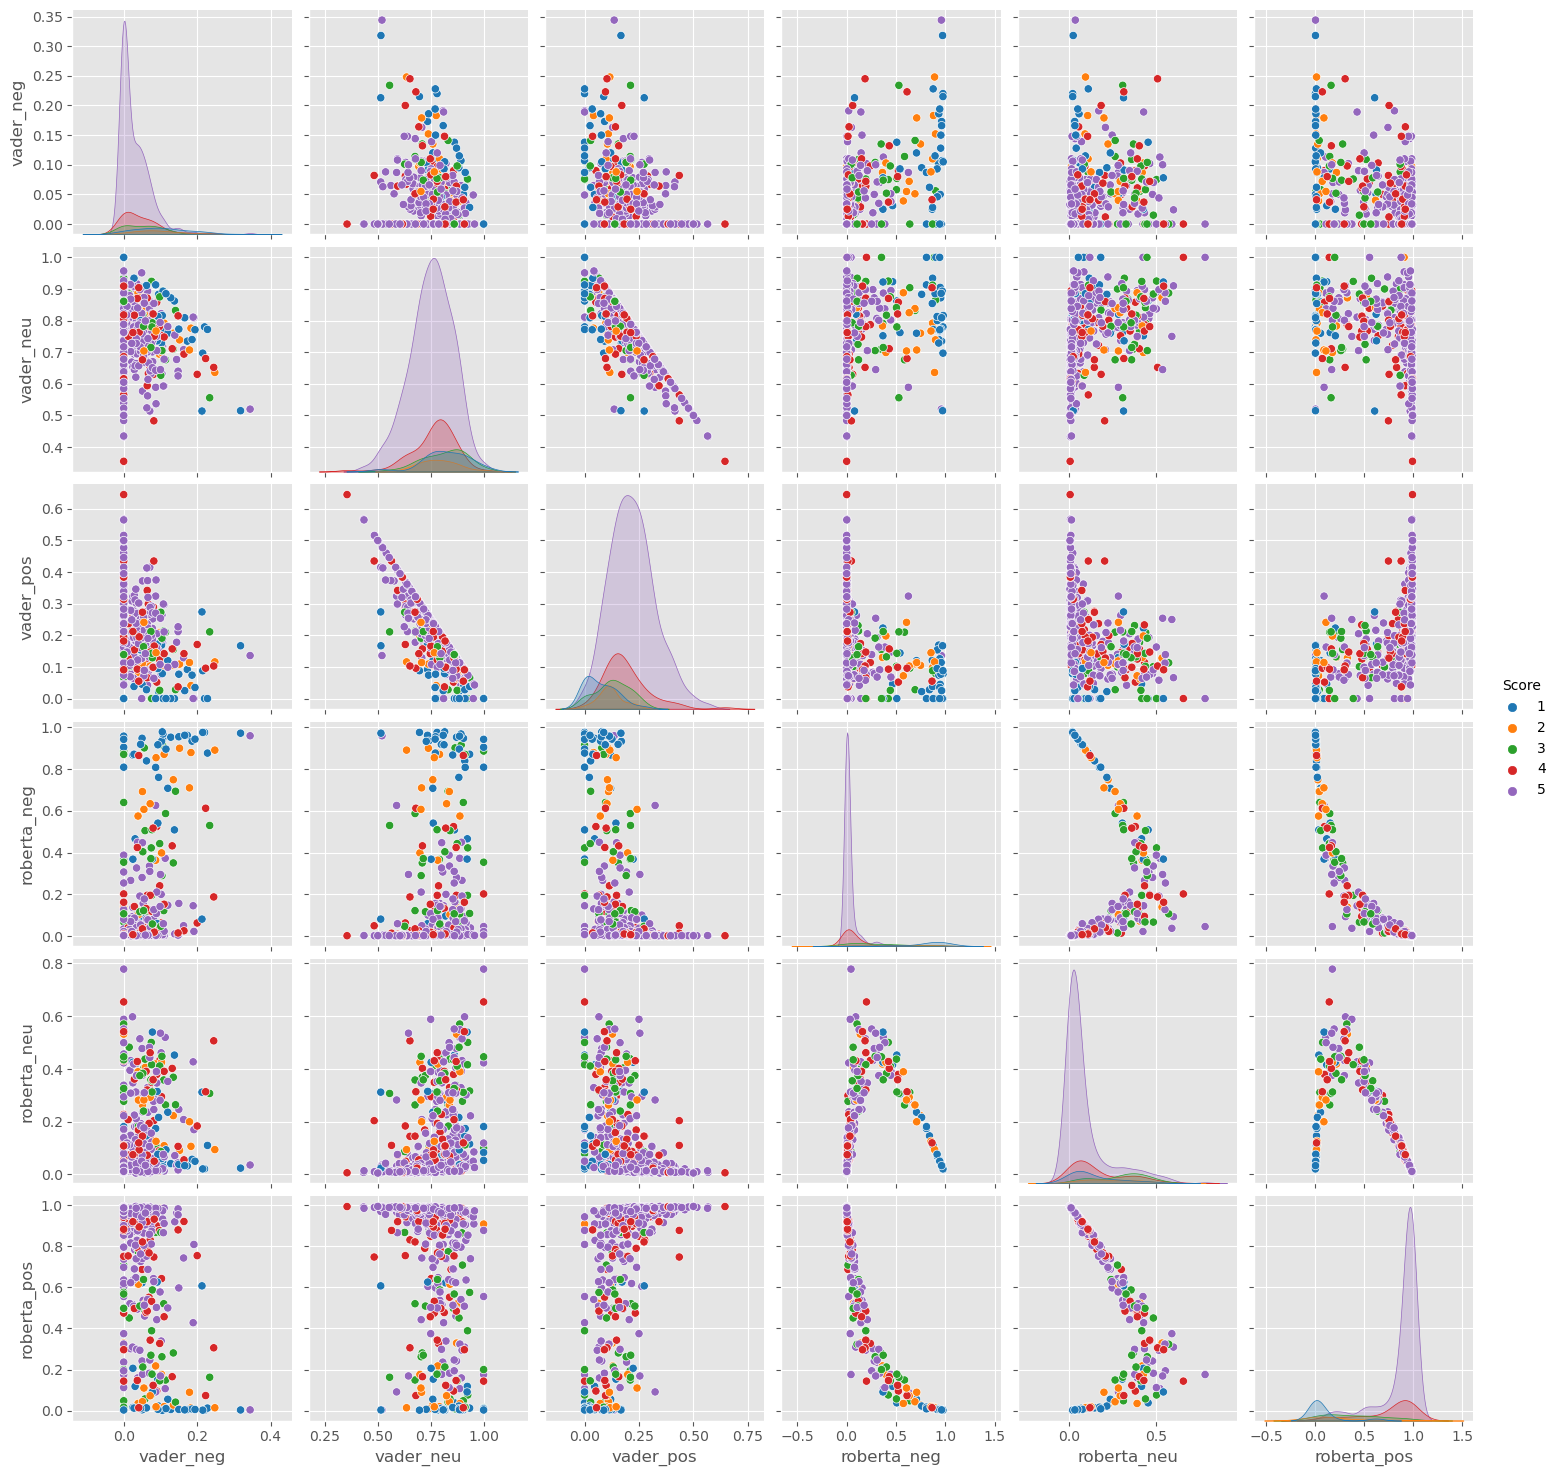

c:\Users\lokma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1500x1000 with 0 Axes>

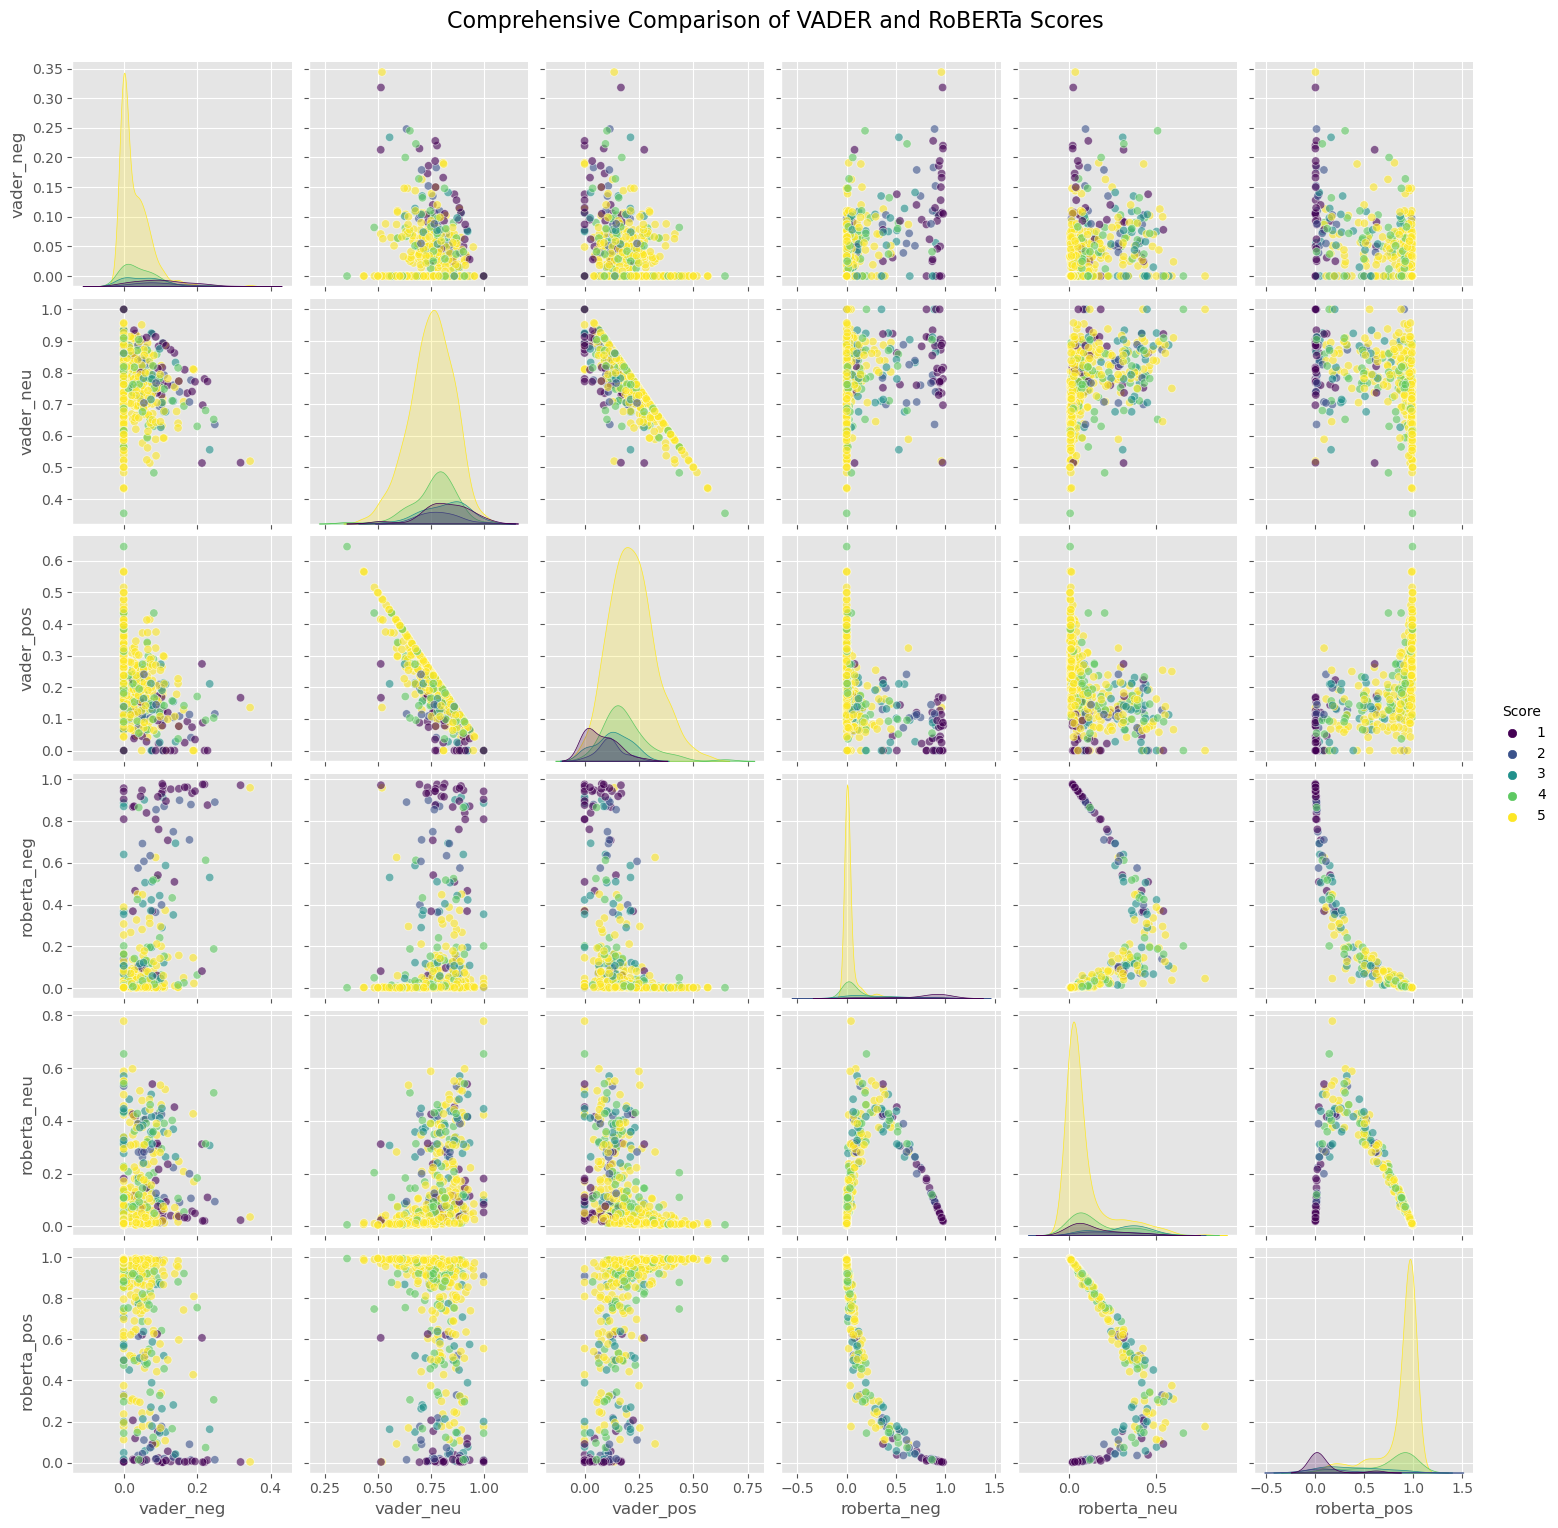


Model Correlation Analysis:
Correlation for NEG sentiment: 0.520
Correlation for NEU sentiment: 0.372
Correlation for POS sentiment: 0.566


In [33]:
sns.pairplot(data = results_df,
             vars = ['vader_neg', 'vader_neu', 'vader_pos', \
                    'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue = 'Score',
             palette = 'tab10'
            )
plt.show()

# Create an advanced comparison visualization
plt.figure(figsize=(15, 10))

# Create a comprehensive comparison plot
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='viridis',
             diag_kind='kde',  # Kernel Density Estimation for diagonal plots
             plot_kws={'alpha': 0.6})

plt.suptitle('Comprehensive Comparison of VADER and RoBERTa Scores', y=1.02, fontsize=16)
plt.show()

# Print summary statistics
print('\nModel Correlation Analysis:')
for v in ['neg', 'neu', 'pos']:
    corr = results_df[f'vader_{v}'].corr(results_df[f'roberta_{v}'])
    print(f'Correlation for {v.upper()} sentiment: {corr:.3f}')

- 5 Stars review is the purplish color

# Step 4: Review Examples:
## Positive 1-Star and Negative 5-Star Reviews

Let's look at some examples where the model scoring and review score differ the most

In [34]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending = False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [35]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending = False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

- Review above is being a little sarcastic
- The model does not pick up on that especially the VADER type of models which is only looking at a bag of words for all of the sentences and the score of each word individually

## Negative sentiment 5-Star Review

In [36]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [37]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

- Both of the review shown above is sort of a negative sentiment but a positive review
- Both models got confused but maybe this is actually is a negative sentiment for a positive review, so maybe it did a better job than what would we expect to see

# Extra: The Transformer Pipeline
- Quick & easy way to run sentiment predictions

In [38]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [39]:
sent_pipeline('I love sentiment analysis')

[{'label': 'POSITIVE', 'score': 0.999736487865448}]

# Conclusion and Key Findings 📑

## Model Comparison

1. **VADER Strengths:**
   - Fast and lightweight
   - No training required
   - Good for simple, straightforward text
   - Excellent for social media content

2. **RoBERTa Strengths:**
   - Better understanding of context
   - Superior handling of complex sentences
   - More accurate on modern language
   - Better at detecting subtle sentiments

## Practical Applications

Based on our analysis:
- Use VADER for: Quick analysis, social media monitoring, real-time applications
- Use RoBERTa for: Complex text analysis, professional content, when accuracy is critical

## Future Improvements

- Combine both approaches for a hybrid solution
- Fine-tune RoBERTa on domain-specific data
- Add support for multiple languages
- Implement emotion detection alongside sentiment

---
*This notebook is part of my portfolio demonstrating practical NLP skills and understanding of different sentiment analysis approaches.*